<h1><center>Housing Analysis</center></h1>

In this notebook, I will analyze the following housing data: 

1) Ontario Property Prices (<a href='https://www.kaggle.com/mnabaee/ontarioproperties'>Kaggle</a>, July 2016)<br>
2) Average rents for areas with a population of 10,000 and over (<a href='https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3410013301'>CMHC</a>)<br>
3) Residential property values for census metropolitan areas (<a href='https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3410001302'>CMHC</a>)<br>
4) Craigslist rent and condo property prices (Scraped on Oct 14, 2018)<br>

<h3>Part 1: Ontario Property Prices</h3>

I would like to find out which areas are the most expensive, and which areas have the most properties on sale.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_ont = pd.read_csv('Data/properties.csv')
df_ont = df_ont[['Address', 'AreaName', 'Price ($)', 'lat', 'lng']] # Remove first unnamed column
df_ont.head()

,Address,AreaName,Price ($),lat,lng
0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118


In [2]:
df_ont.info() #Need to remove null values from AreaName

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25351 entries, 0 to 25350
Data columns (total 5 columns):
Address      25351 non-null object
AreaName     24868 non-null object
Price ($)    25351 non-null int64
lat          25351 non-null float64
lng          25351 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 990.4+ KB


In [3]:
df_ont.describe() #Need to remove invalid -999 latitude/longitude values

,Price ($),lat,lng
count,2.535100e+04,25351.000000,25351.000000
mean,5.645438e+05,37.326614,-85.218379
std,8.475962e+05,82.858347,73.093572
min,0.000000e+00,-999.000000,-999.000000
25%,2.199000e+05,43.401087,-80.308159
50%,3.719000e+05,43.715977,-79.503342
75%,6.199000e+05,44.466711,-79.107326
max,3.250000e+07,53.851017,1.074519


There are some latitude/longitude values that are -999, I'm going to remove them since the AreaName for these rows is blank, and I need the area name for analysis. <br>
Also, I am only analyzing prices >= 50k since a lot of lower prices are empty lots for sale, also the data might not be relevant.

In [4]:
df_ont = df_ont[(df_ont['lat'] != -999 ) & (df_ont['lng'] != -999)]
df_ont = df_ont[df_ont['Price ($)'] >= 50000]

In [5]:
df_ont.describe()

,Price ($),lat,lng
count,2.368000e+04,23680.000000,23680.000000
mean,6.005352e+05,43.954042,-79.341442
std,8.645627e+05,0.996860,2.388262
min,5.000000e+04,36.160065,-118.061340
25%,2.499000e+05,43.429796,-80.263346
50%,3.950000e+05,43.722698,-79.484066
75%,6.488820e+05,44.475199,-79.091738
max,3.250000e+07,53.851017,1.074519


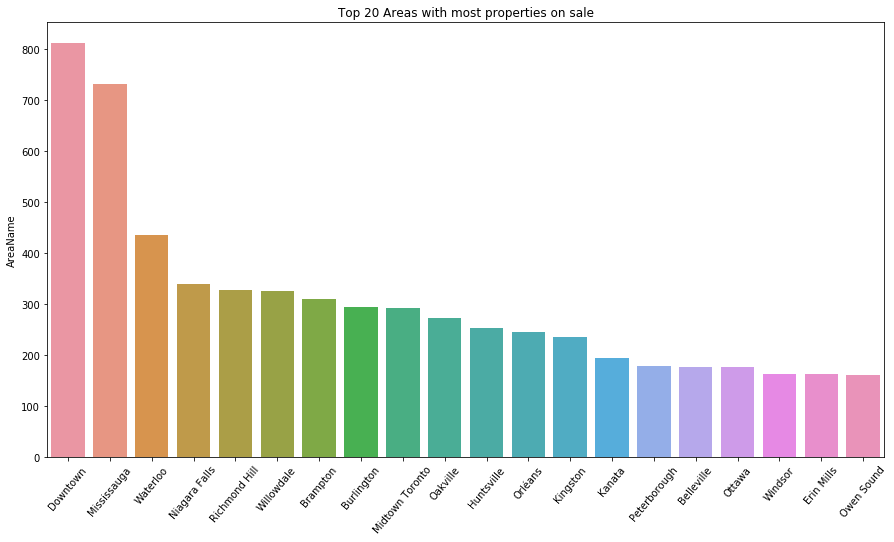

In [6]:
# Which area has the most quantity of houses on sale?
num_houses = pd.DataFrame(df_ont['AreaName'].value_counts())
num_houses.sort_values(by='AreaName')
plt.figure(figsize=(15,8))
bar_ax = sns.barplot(x = num_houses[0:20].index, y="AreaName", data=num_houses[0:20])
bar_ax.set_xticklabels(bar_ax.get_xticklabels(),rotation=50)
plt.title("Top 20 Areas with most properties on sale")
plt.show()

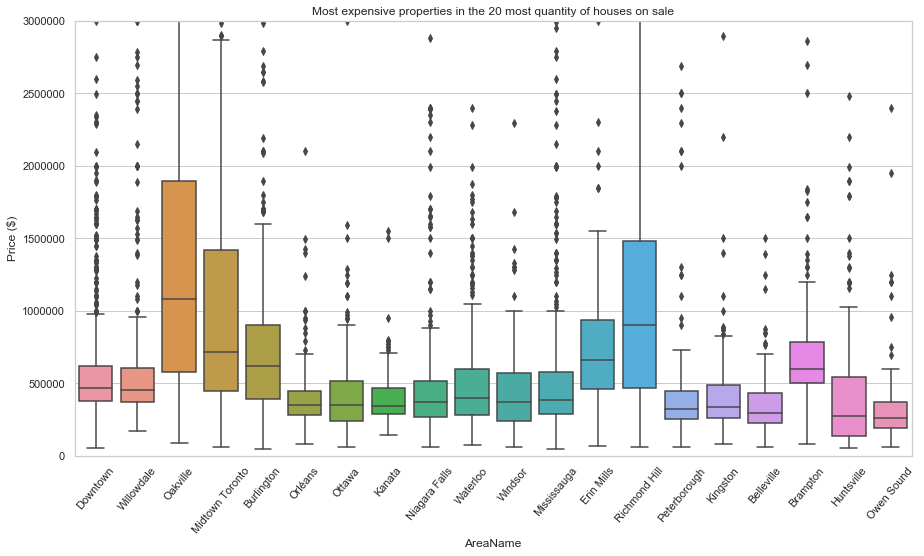

,Address,AreaName,Price ($),lat,lng
4,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118
15,"#710 - 1080 Bay St Toronto, ON",Downtown,805900,43.666794,-79.388756
19,"#4905 - 16 Harbour St Toronto, ON",Downtown,1348000,43.642578,-79.376900
35,"#2705 - 70 Temperance St Toronto, ON",Downtown,325000,43.650372,-79.382347
41,"#1209 - 35 Finch Ave Toronto, ON",Willowdale,419000,43.779987,-79.412735


In [7]:
# Which area has the most expensive houses on sale?
topAreasNames = list(num_houses[0:20].index)
area = df_ont[df_ont['AreaName'].isin(topAreasNames)]
#box_ax = area.boxplot(column='Price ($)', by='AreaName', rot=90, grid=True)
plt.figure(figsize=(15,8))
sns.set(style="whitegrid")
box_ax = sns.boxplot(x=area['AreaName'], y=area['Price ($)'])
box_ax.set_ylim([0, 3e6])
box_ax.set_xticklabels(box_ax.get_xticklabels(),rotation=50)
plt.title("Most expensive properties in the 20 most quantity of houses on sale")
plt.show()
area.head()

Interestingly enough, the Oakville area seems more expensive than Downtown. This could be due to the sheer amount of properties being sold in Downtown compared to Oakville, and also the fact that Oakville has a lot of high end luxury homes. <br> Looking at the graph below, we see that Oakville has the highest average prices (out of the top 20 areas with the most properties), with Downtown being in the middle.

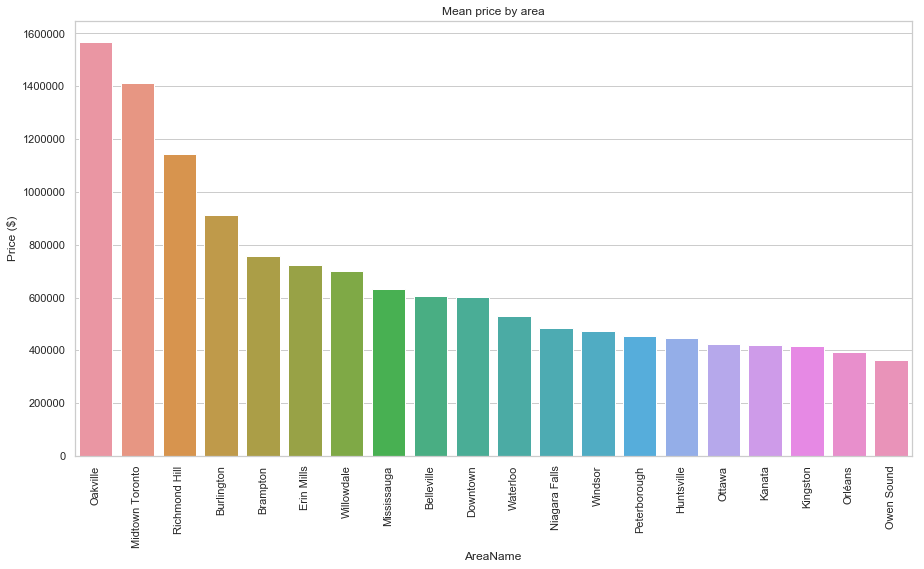

In [8]:
#Mean Price by Area(Top 20 most properties sold)
area_dropped = area.drop(['Address','lat','lng'], axis=1)
meanPrices = area_dropped.groupby(['AreaName']).mean().sort_values(by='Price ($)', ascending=False)
plt.figure(figsize=(15,8))
#ax = meanPrices.plot(kind='bar', title='Top 20 Mean Prices of Houses by Area')
ax = sns.barplot(x = meanPrices.index, y="Price ($)", data=meanPrices)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Mean price by area")
plt.show()

<h3>Part 2: Average rents for areas with a population of 10,000 and over<h3>

I would like to analyze the rent prices over time, as well as number of bedrooms. I am interested in looking at Canada and Toronto's prices.

In [9]:
df_rent_can = pd.read_csv('Data/34100133.csv')
df_rent_can = df_rent_can[['REF_DATE', 'GEO', 'Type of unit', 'VALUE']]
df_rent_can.dropna(subset=['VALUE'], inplace=True)
df_rent_can = df_rent_can[df_rent_can['VALUE'] != 0] # Remove all values with 0 and NaN
df_rent_can.drop_duplicates(subset=None, inplace=True) # Remove duplicate rows
df_rent_can.head()

C:\Users\Dhaval\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,REF_DATE,GEO,Type of unit,VALUE
34,1987,"Corner Brook, Newfoundland and Labrador",Two bedroom units,480.0
49,1987,"Gander, Newfoundland and Labrador",One bedroom units,370.0
50,1987,"Gander, Newfoundland and Labrador",Two bedroom units,414.0
51,1987,"Gander, Newfoundland and Labrador",Three bedroom units,414.0
69,1987,"Labrador City, Newfoundland and Labrador",One bedroom units,254.0


Here we see the average rent (as well as min/max) in Canada over time. Looking at the graph, the prices seem to be increasing linearly.

In [10]:
#df_rent_can.shape
df_rent_can.groupby('REF_DATE').VALUE.agg(['min', 'max', 'mean'])

,min,max,mean
REF_DATE,,,
1987,169.0,706.0,369.572779
1988,178.0,749.0,382.834677
1989,183.0,849.0,404.400000
1990,192.0,876.0,423.514870
1991,203.0,901.0,444.288679
1992,202.0,939.0,473.287577
1993,208.0,943.0,483.799308
1994,203.0,957.0,493.122831
1995,219.0,1003.0,498.907420


Text(0.5,1,'Avg. Rent in Canada Vs Year')

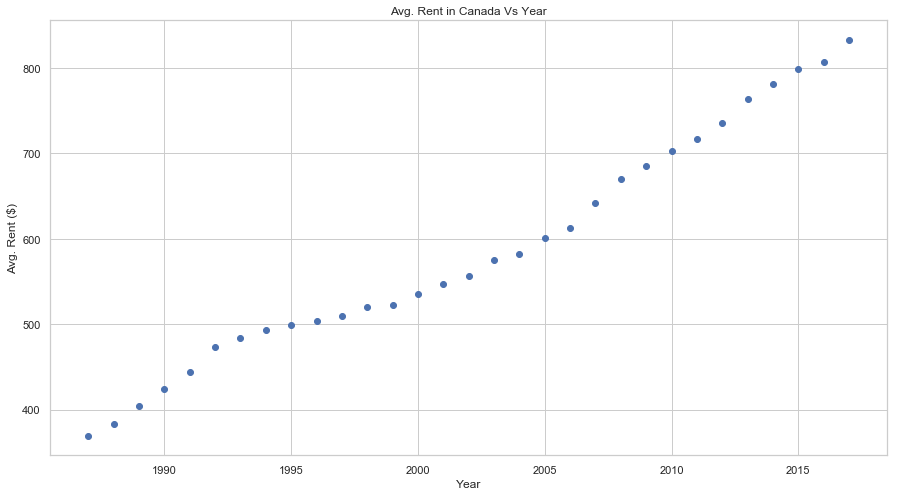

In [11]:
df_rent_can_group_year = df_rent_can.groupby('REF_DATE').VALUE.agg(['min', 'max', 'mean'])
plt.figure(figsize=(15,8))
plt.scatter(df_rent_can_group_year['mean'].index, df_rent_can_group_year['mean'].values)
plt.xlabel('Year')
plt.ylabel('Avg. Rent ($)')
plt.title('Avg. Rent in Canada Vs Year')

In [12]:
grouped_unit_date = df_rent_can.groupby(['Type of unit', 'REF_DATE']).VALUE.agg(['min', 'max', 'mean'])

Here we see the average rent (as well as min/max) in Canada over time and type of unit.

In [13]:
grouped_unit_date

min     max        mean
Type of unit      REF_DATE                           
Bachelor units    1987      179.0   488.0  272.193277
                  1988      178.0   482.0  283.810811
                  1989      183.0   478.0  296.342105
                  1990      192.0   499.0  310.579365
                  1991      203.0   507.0  327.622951
                  1992      202.0   522.0  331.248963
                  1993      208.0   510.0  341.020833
                  1994      203.0   517.0  345.112971
                  1995      219.0   539.0  348.765873
                  1996      217.0   556.0  353.555556
                  1997      209.0   565.0  358.008197
                  1998      234.0   643.0  363.487395
                  1999      217.0   646.0  369.563492
                  2000      212.0   723.0  382.224490
                  2001      236.0   790.0  386.959184
                  2002      232.0   817.0  395.858268
                  2003      245.0   821.0  405.384615
                  2004      255.0   816.0  413.772926
                  2005      263.0   914.0  428.881279
                  2006      260.0  1030.0  439.143911
                  2007      266.0  1263.0  457.793478
                  2008      269.0  1444.0  483.230769
                  2009      303.0  1407.0  482.272414
                  2010      311.0  1405.0  499.237410
                  2011      305.0  1406.0  512.212544
                  2012      273.0  1370.0  524.751701
                  2013      273.0  1443.0  544.536842
                  2014      284.0  1452.0  550.568966
                  2015      270.0  1327.0  561.154930
                  2016      301.0  1326.0  574.469388
...                           ...     ...         ...
Two bedroom units 1988      253.0   624.0  421.335714
                  1989      268.0   700.0  441.985816
                  1990      278.0   751.0  465.594406
                  1991      280.0   754.0  487.787234
                  1992      293.0   800.0  502.168618
                  1993      301.0   819.0  512.516667
                  1994      303.0   860.0  524.486811
                  1995      314.0   880.0  529.649289
                  1996      316.0   877.0  535.122931
                  1997      321.0   908.0  539.846868
                  1998      323.0  1031.0  548.334086
                  1999      325.0   989.0  555.651584
                  2000      328.0  1010.0  566.083333
                  2001      330.0  1085.0  581.928889
                  2002      333.0  1122.0  585.475446
                  2003      338.0  1270.0  602.688196
                  2004      349.0  1305.0  613.722727
                  2005      361.0  1478.0  631.954048
                  2006      365.0  1717.0  651.175258
                  2007      371.0  2086.0  681.226378
                  2008      384.0  2360.0  710.246824
                  2009      398.0  2156.0  731.200000
                  2010      405.0  2210.0  742.932504
                  2011      414.0  2049.0  761.892922
                  2012      404.0  2002.0  783.793651
                  2013      432.0  2163.0  811.466786
                  2014      419.0  2118.0  833.194737
                  2015      423.0  1842.0  852.792982
                  2016      436.0  1718.0  858.847100
                  2017      431.0  1718.0  883.044803

[124 rows x 3 columns]

In [14]:
grouped_unit_date.loc['Bachelor units']

,min,max,mean
REF_DATE,,,
1987,179.0,488.0,272.193277
1988,178.0,482.0,283.810811
1989,183.0,478.0,296.342105
1990,192.0,499.0,310.579365
1991,203.0,507.0,327.622951
1992,202.0,522.0,331.248963
1993,208.0,510.0,341.020833
1994,203.0,517.0,345.112971
1995,219.0,539.0,348.765873


In [15]:
grouped_unit_date.loc['One bedroom units']

,min,max,mean
REF_DATE,,,
1987,169.0,470.0,343.578231
1988,208.0,494.0,355.517986
1989,243.0,536.0,375.055944
1990,257.0,581.0,392.683099
1991,245.0,605.0,412.835714
1992,255.0,751.0,415.713881
1993,235.0,736.0,421.423631
1994,243.0,730.0,428.136628
1995,257.0,766.0,435.974212


In [16]:
grouped_unit_date.loc['Two bedroom units']

,min,max,mean
REF_DATE,,,
1987,263.0,590.0,406.854305
1988,253.0,624.0,421.335714
1989,268.0,700.0,441.985816
1990,278.0,751.0,465.594406
1991,280.0,754.0,487.787234
1992,293.0,800.0,502.168618
1993,301.0,819.0,512.516667
1994,303.0,860.0,524.486811
1995,314.0,880.0,529.649289


In [17]:
grouped_unit_date.loc['Three bedroom units']

,min,max,mean
REF_DATE,,,
1987,280.0,706.0,456.892857
1988,292.0,749.0,471.500000
1989,284.0,849.0,496.327869
1990,305.0,876.0,522.653543
1991,318.0,901.0,542.740157
1992,314.0,939.0,570.128440
1993,328.0,943.0,583.913242
1994,326.0,957.0,594.371882
1995,340.0,1003.0,603.899103


I would like to know which city in Canada has the most expensive rent. Surprisingly it's Wood Buffalo, Fort McMurray, not Downtown Toronto as I was expecting. I found out that the rent is extremely high in Wood Buffalo because the average income is almost twice as high compared to Canada's average income.

In [18]:
df_rent_can.loc[df_rent_can['VALUE'].idxmax()]

REF_DATE                         2010
GEO             Wood Buffalo, Alberta
Type of unit      Three bedroom units
VALUE                            2673
Name: 81899, dtype: object

In [19]:
df_rent_can.nlargest(25, 'VALUE') # 25 highest rent prices are mostly Wood Buffalo

,REF_DATE,GEO,Type of unit,VALUE
81899,2010,"Wood Buffalo, Alberta",Three bedroom units,2673.0
91931,2013,"Wood Buffalo, Alberta",Three bedroom units,2662.0
95259,2014,"Wood Buffalo, Alberta",Three bedroom units,2653.0
78523,2009,"Wood Buffalo, Alberta",Three bedroom units,2620.0
81907,2010,"Wood Buffalo, Alberta",Three bedroom units,2525.0
78531,2009,"Wood Buffalo, Alberta",Three bedroom units,2483.0
75147,2008,"Wood Buffalo, Alberta",Three bedroom units,2468.0
98587,2015,"Wood Buffalo, Alberta",Three bedroom units,2451.0
91939,2013,"Wood Buffalo, Alberta",Three bedroom units,2393.0
95267,2014,"Wood Buffalo, Alberta",Three bedroom units,2391.0


Now it's time to look at Toronto's data only.

In [20]:
df_toronto = df_rent_can[df_rent_can['GEO'] == 'Toronto, Ontario']

In [21]:
df_toronto

,REF_DATE,GEO,Type of unit,VALUE
2208,1987,"Toronto, Ontario",Bachelor units,377.0
2209,1987,"Toronto, Ontario",One bedroom units,470.0
2210,1987,"Toronto, Ontario",Two bedroom units,567.0
2211,1987,"Toronto, Ontario",Three bedroom units,704.0
5608,1988,"Toronto, Ontario",Bachelor units,405.0
5609,1988,"Toronto, Ontario",One bedroom units,494.0
5610,1988,"Toronto, Ontario",Two bedroom units,599.0
5611,1988,"Toronto, Ontario",Three bedroom units,749.0
8992,1989,"Toronto, Ontario",Bachelor units,428.0
8993,1989,"Toronto, Ontario",One bedroom units,528.0


In [22]:
# Need to average duplicates: There really aren't any duplicates in the dataset, but since I removed a column that I'm not
# interested in (Type of Structure), it looks like there are duplicates

In [23]:
# Convert groupby object to dataframe
df_toronto = df_toronto.groupby(['REF_DATE', 'Type of unit']).VALUE.mean().to_frame().reset_index()
df_toronto

,REF_DATE,Type of unit,VALUE
0,1987,Bachelor units,377.000000
1,1987,One bedroom units,470.000000
2,1987,Three bedroom units,704.000000
3,1987,Two bedroom units,567.000000
4,1988,Bachelor units,405.000000
5,1988,One bedroom units,494.000000
6,1988,Three bedroom units,749.000000
7,1988,Two bedroom units,599.000000
8,1989,Bachelor units,428.000000
9,1989,One bedroom units,528.000000


In 2017, the average rent in Toronto for one bedroom units is 1221, which is lower that what I was expecting since I kept reading on the news that the average rent in Toronto is 1600. <br>
Below is the average rent in Toronto (across all types of units). The graph shows a linear growth pattern over time.

In [24]:
df_toronto.groupby('REF_DATE').VALUE.mean()

REF_DATE
1987     529.500000
1988     561.750000
1989     599.000000
1990     633.500000
1991     670.750000
1992     704.791667
1993     719.500000
1994     732.250000
1995     750.583333
1996     765.270833
1997     764.750000
1998     813.750000
1999     848.937500
2000     914.354167
2001     947.437500
2002     980.000000
2003     973.000000
2004     978.687500
2005     979.395833
2006     993.250000
2007     993.729167
2008    1017.750000
2009    1020.208333
2010    1043.937500
2011    1074.375000
2012    1109.166667
2013    1137.937500
2014    1159.062500
2015    1199.812500
2016    1231.812500
2017    1305.312500
Name: VALUE, dtype: float64

Text(0.5,1,'Avg. Rent in Toronto Vs Year')

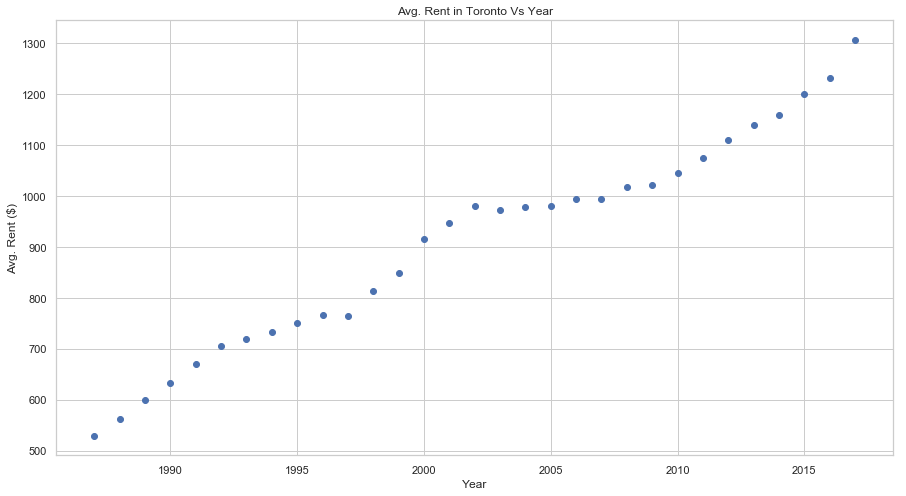

In [25]:
plt.figure(figsize=(15,8))
plt.scatter(df_toronto.groupby('REF_DATE').VALUE.mean().index, df_toronto.groupby('REF_DATE').VALUE.mean().values)
plt.xlabel('Year')
plt.ylabel('Avg. Rent ($)')
plt.title('Avg. Rent in Toronto Vs Year')

Now I would like to predict the rent prices in Toronto using linear regression. The (average) predicted rent price in 2030 is 1538.36, which is honestly much lower than what I expect in reality.

Slope:  [22.50657762]
Intercept:  -44149.98896169352
Predicted Rent price in 2030:  [1538.36360887]


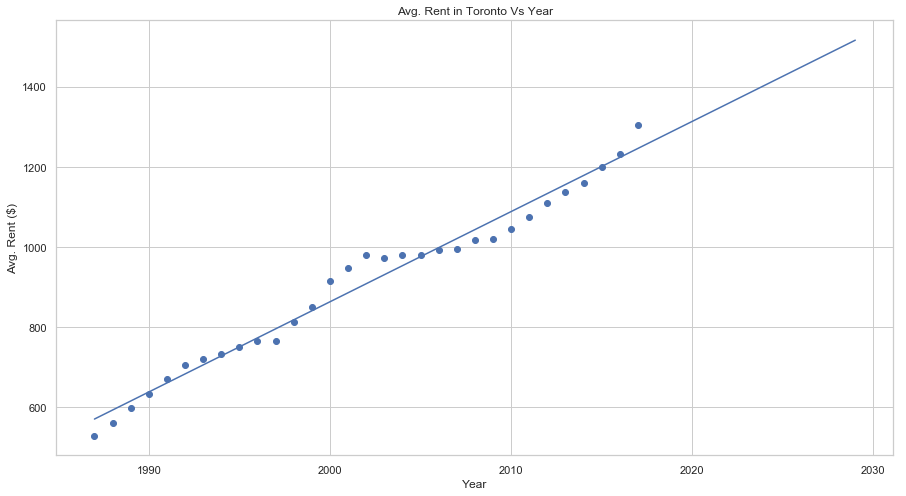

In [26]:
from sklearn.linear_model import LinearRegression

X = df_toronto.groupby('REF_DATE').VALUE.mean().index
Y = df_toronto.groupby('REF_DATE').VALUE.mean().values

# Needs to be 2D
X = np.reshape(X, (X.size, 1))

# Not interested in doing train/test split, I just want to do curve-fitting
lr = LinearRegression()
lr.fit(X,Y)

# The coefficients
print('Slope: ', lr.coef_)
print('Intercept: ', lr.intercept_)

x_line = np.arange(1987,2030).reshape(-1,1)
p = lr.predict(x_line).T
print('Predicted Rent price in 2030: ', lr.predict(2030))
plt.figure(figsize=(15,8))
plt.scatter(X, Y)
plt.plot(x_line, p)
plt.xlabel('Year')
plt.ylabel('Avg. Rent ($)')
plt.title('Avg. Rent in Toronto Vs Year')
plt.show()

<h3>Part 3: Residential property values for census metropolitan areas<h3>

I would like to analyze the property prices over time. I am interested in looking at Canada and Toronto's prices

In [27]:
# Analyzing property values
df_property_can = pd.read_csv('Data/34100013.csv')
df_property_can = df_property_can[['REF_DATE', 'GEO', 'VALUE']]
df_property_can.head()

,REF_DATE,GEO,VALUE
0,2005,Canada,2342865.3
1,2005,Newfoundland and Labrador,18494.1
2,2005,Prince Edward Island,4332.9
3,2005,Nova Scotia,44301.1
4,2005,New Brunswick,22649.0


In [28]:
# Remove totals: Canada + provinces

# Can't use this simple filter since some don't have commas
# df_property_can[df_property_can['GEO'].str.contains(',')] 
df_property_can = df_property_can[(df_property_can['GEO'] != 'Canada') & (df_property_can['GEO'] != 'Newfoundland and Labrador') &
                                 (df_property_can['GEO'] != 'Prince Edward Island') & (df_property_can['GEO'] != 'Nova Scotia') &
                                 (df_property_can['GEO'] != 'New Brunswick') & (df_property_can['GEO'] != 'Quebec') &
                                 (df_property_can['GEO'] != 'Ontario') & (df_property_can['GEO'] != 'Manitoba') &
                                 (df_property_can['GEO'] != 'Saskatchewan') & (df_property_can['GEO'] != 'Alberta') &
                                 (df_property_can['GEO'] != 'British Columbia') & (df_property_can['GEO'] != 'Yukon') &
                                 (df_property_can['GEO'] != 'Northwest Territories') & (df_property_can['GEO'] != 'Nunavut') &
                                 (df_property_can['GEO'] != 'Total census metropolitan areas')]

In [29]:
df_property_can

,REF_DATE,GEO,VALUE
15,2005,"St. John's, Newfoundland and Labrador",8608.7
16,2005,"Halifax, Nova Scotia",22797.2
17,2005,"Saint John, New Brunswick",4198.9
18,2005,"Moncton, New Brunswick",4708.7
19,2005,"Montréal, Quebec",232470.6
20,2005,"Québec, Quebec",34624.6
21,2005,"Saguenay, Quebec",5357.8
22,2005,"Sherbrooke, Quebec",9033.3
23,2005,"Trois-Rivières, Quebec",4941.8
24,2005,"Barrie, Ontario",14304.2


Text(0.5,1,'Avg. Property Prices in Canada Vs Year')

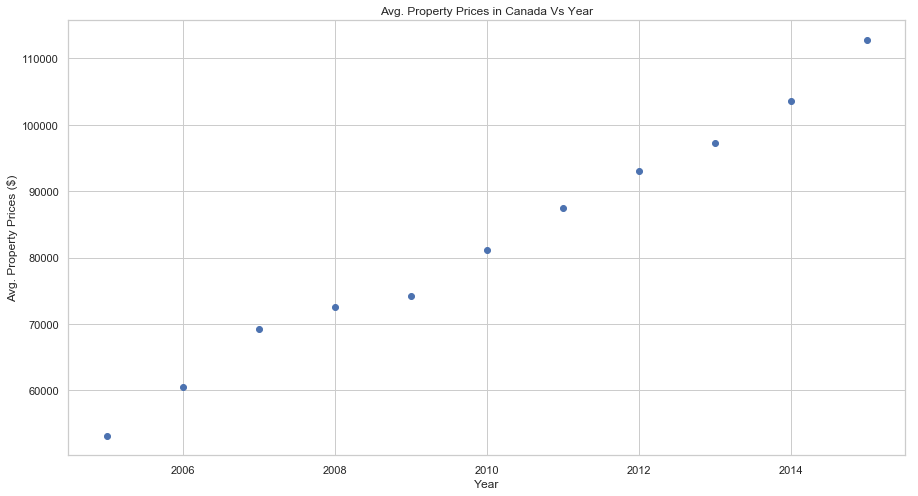

In [30]:
plt.figure(figsize=(15,8))
plt.scatter(df_property_can.groupby('REF_DATE').VALUE.mean().index, df_property_can.groupby('REF_DATE').VALUE.mean().values)
plt.xlabel('Year')
plt.ylabel('Avg. Property Prices ($)')
plt.title('Avg. Property Prices in Canada Vs Year')

The average property prices in Canada seem to be increasing linearly. Now I would like to look on Toronto.

In [31]:
df_property_tor = df_property_can[df_property_can['GEO'] == 'Toronto, Ontario']

Text(0.5,1,'Property Prices in Toronto Vs Year')

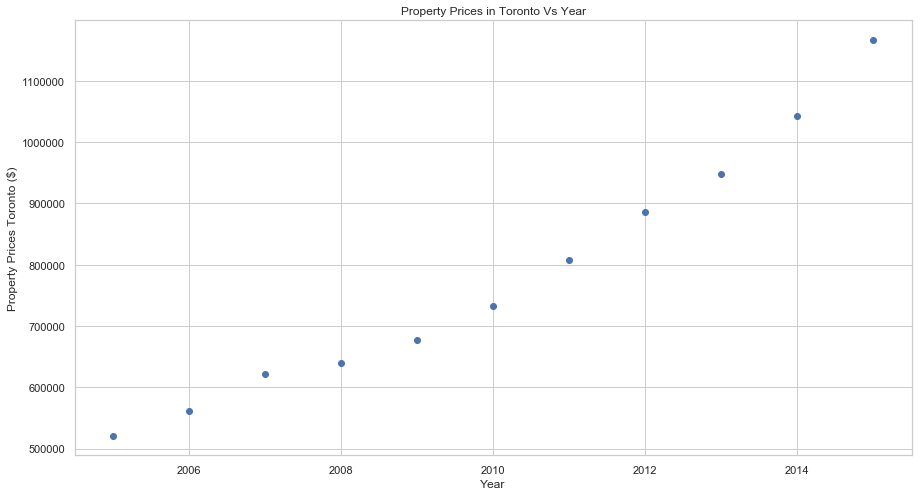

In [32]:
plt.figure(figsize=(15,8))
plt.scatter(df_property_tor['REF_DATE'], df_property_tor['VALUE'])
plt.xlabel('Year')
plt.ylabel('Property Prices Toronto ($)')
plt.title('Property Prices in Toronto Vs Year')

<p>Interestingly there was only a slight hiccup (not a market crash) in the property prices in Canada and Toronto in 2008, unlike the US. Also, the property prices in Toronto seem to be increasing exponentially.</p>

In [33]:
df_property_can.nlargest(25, 'VALUE') 

,REF_DATE,GEO,VALUE
539,2015,"Toronto, Ontario",1166506.4
489,2014,"Toronto, Ontario",1043127.1
439,2013,"Toronto, Ontario",947575.6
389,2012,"Toronto, Ontario",886014.9
339,2011,"Toronto, Ontario",807348.2
289,2010,"Toronto, Ontario",733466.5
239,2009,"Toronto, Ontario",677060.3
548,2015,"Vancouver, British Columbia",657215.8
189,2008,"Toronto, Ontario",639716.6
139,2007,"Toronto, Ontario",621337.0


Looking at the 25 highest property prices in Canada, we see the vast majority of them in Toronto and Vancouver (with 3rd highest being Montreal) as expected.
I'm assuming the property prices in Wood Buffalo are even higher than Toronto because of the high rent prices from 
previous section. But the data for Wood Buffalo isn't here since the data only contains metropolitan areas. <br><br>
Now I would like to perform linear regression to predict future property prices in Toronto.

Slope:  [0.07821869]
Intercept:  -143.6809069562071
Predicted Property price in 2030:  [3623833.40626566]


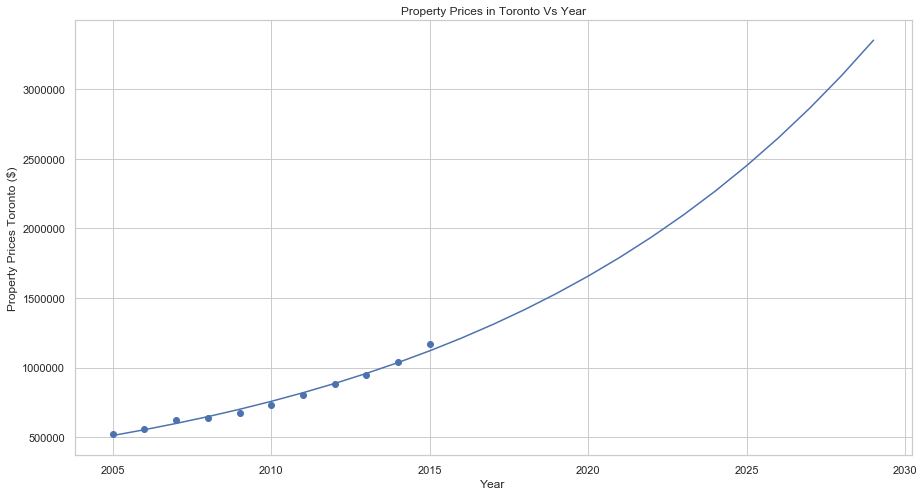

In [71]:
X = df_property_tor['REF_DATE'].values
Y = df_property_tor['VALUE'].values

# Transform the Y data to make it a straight line
log_Y = np.log(Y)

# Needs to be 2D
X = np.reshape(X, (X.size, 1))

# Not interested in doing train/test split since I only have 10 data points, I just want to do curve-fitting
lr = LinearRegression()
lr.fit(X,log_Y)

# The coefficients
print('Slope: ', lr.coef_)
print('Intercept: ', lr.intercept_)

x_line = np.arange(2005,2030).reshape(-1,1)
p = lr.predict(x_line).T
print('Predicted Property price in 2030: ', np.exp(lr.predict(2030)))
plt.figure(figsize=(15,8))
plt.scatter(X, Y)
plt.plot(x_line, np.exp(p))
plt.xlabel('Year')
plt.ylabel('Property Prices Toronto ($)')
plt.title('Property Prices in Toronto Vs Year')
#plt.plot(x_line,np.exp(lr.coef_*x_line + lr.intercept_))
plt.show()

The predicted property price in Toronto in 2030 is $3,623,833, which seems about right with the way property prices are going.

<h3>Part 4: Analyzing latest rent and condominium prices on Craigslist</h3>

Since the datasets I analyzed in the previous section are a little old, I would like to look at the latest data to get an idea of current prices by looking at Craigslist. I decided to look at the rent and property prices of condominiums and apartments only, because houses are out of reach of most millenials anyway, so I'm not interested in house price data. <br>
The Craigslist data was scraped on Oct 14, 2018. For details on the scraping process, see: Craigslist_web_scraper.ipynb <br><br>
I am interested in analyzing the price with respect to square feet and number of bedrooms. I would have also liked to analyze the price vs neighbourhood relationship, but unfortunately the "Hood" column was not as clean/organized as I expected (since they contain specific addresses). <br><br>
First, I will look at the rent data.

In [35]:
df_cl_rent = pd.read_csv('Data/Craigslist_rent.csv')
df_cl_rent.head()

,Datetime,ID,Link,Price,SqrFeet,Hood,Housing
0,2018-10-14 00:13,6722890390,https://toronto.craigslist.ca/tor/apa/d/toront...,1735,0,(Toronto),2br
1,2018-10-14 00:09,6722914736,https://toronto.craigslist.ca/tor/apa/d/22-rus...,1950,600ft2,(22 Rusholme Park Crescent Toronto),1br
2,2018-10-13 23:53,6722910510,https://toronto.craigslist.ca/tor/apa/d/761-ba...,2150,600ft2,(Bay and College),1br
3,2018-10-13 23:40,6718963480,https://toronto.craigslist.ca/tor/apa/d/availa...,1550,0,(Scarborough),1br
4,2018-10-13 23:38,6722906418,https://toronto.craigslist.ca/tor/apa/d/privet...,550,0,(Don Mills and Eglinton),2br


In [36]:
df_cl_buy = pd.read_csv('Data/Craigslist_buy.csv')
df_cl_buy.head()

,Datetime,ID,Link,Price,SqrFeet,Hood,Housing
0,2018-10-13 23:26,6722902927,https://toronto.craigslist.ca/tor/reo/d/leslie...,1299000,0,(Gerrard and Coxwell),4br
1,2018-10-13 21:43,6722858430,https://toronto.craigslist.ca/tor/reb/d/beauti...,299900,850ft2,(100 Dundalk Dr),2br
2,2018-10-13 21:43,6722866107,https://toronto.craigslist.ca/tor/reb/d/freshl...,370000,1100ft2,(3 Massey Sq),2br
3,2018-10-13 21:29,6722860383,https://toronto.craigslist.ca/tor/reb/d/manhat...,828000,1590ft2,(131 Beecroft Road),2br
4,2018-10-13 20:19,6718248126,https://toronto.craigslist.ca/bra/reb/d/excell...,0,0,(Central Erin Mills),2br


In [37]:
df_cl_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3426 entries, 0 to 3425
Data columns (total 7 columns):
Datetime    3426 non-null object
ID          3426 non-null int64
Link        3426 non-null object
Price       3426 non-null int64
SqrFeet     3426 non-null object
Hood        3426 non-null object
Housing     3426 non-null object
dtypes: int64(2), object(5)
memory usage: 187.4+ KB


In [38]:
df_cl_rent['SqrFeet'] = df_cl_rent['SqrFeet'].str.slice(0, -3) # Remove 'ft2'
df_cl_rent['Housing'] = df_cl_rent['Housing'].str.slice(0, -2) # Remove 'br'

In [39]:
df_cl_rent.head()

,Datetime,ID,Link,Price,SqrFeet,Hood,Housing
0,2018-10-14 00:13,6722890390,https://toronto.craigslist.ca/tor/apa/d/toront...,1735,,(Toronto),2
1,2018-10-14 00:09,6722914736,https://toronto.craigslist.ca/tor/apa/d/22-rus...,1950,600,(22 Rusholme Park Crescent Toronto),1
2,2018-10-13 23:53,6722910510,https://toronto.craigslist.ca/tor/apa/d/761-ba...,2150,600,(Bay and College),1
3,2018-10-13 23:40,6718963480,https://toronto.craigslist.ca/tor/apa/d/availa...,1550,,(Scarborough),1
4,2018-10-13 23:38,6722906418,https://toronto.craigslist.ca/tor/apa/d/privet...,550,,(Don Mills and Eglinton),2


In [40]:
df_cl_rent.info() # There's a lot of empty strings in sqrfeet and housing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3426 entries, 0 to 3425
Data columns (total 7 columns):
Datetime    3426 non-null object
ID          3426 non-null int64
Link        3426 non-null object
Price       3426 non-null int64
SqrFeet     3426 non-null object
Hood        3426 non-null object
Housing     3426 non-null object
dtypes: int64(2), object(5)
memory usage: 187.4+ KB


In [41]:
# Drop housing that has no bedroom info because rent price is not meaningful without number of bedrooms
df_cl_rent['Housing'].replace('', np.nan, inplace=True)
df_cl_rent.dropna(subset=['Housing'], inplace=True)
df_cl_rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 0 to 3425
Data columns (total 7 columns):
Datetime    3142 non-null object
ID          3142 non-null int64
Link        3142 non-null object
Price       3142 non-null int64
SqrFeet     3142 non-null object
Hood        3142 non-null object
Housing     3142 non-null object
dtypes: int64(2), object(5)
memory usage: 196.4+ KB


In [42]:
df_cl_rent['SqrFeet'].replace('', np.nan, inplace=True)
df_cl_rent[['Housing']] = df_cl_rent[['Housing']].astype(int)
df_cl_rent[['SqrFeet']] = df_cl_rent[['SqrFeet']].astype(float)
df_cl_rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 0 to 3425
Data columns (total 7 columns):
Datetime    3142 non-null object
ID          3142 non-null int64
Link        3142 non-null object
Price       3142 non-null int64
SqrFeet     1470 non-null float64
Hood        3142 non-null object
Housing     3142 non-null int32
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 184.1+ KB


In [43]:
df_cl_rent.head()

,Datetime,ID,Link,Price,SqrFeet,Hood,Housing
0,2018-10-14 00:13,6722890390,https://toronto.craigslist.ca/tor/apa/d/toront...,1735,NaN,(Toronto),2
1,2018-10-14 00:09,6722914736,https://toronto.craigslist.ca/tor/apa/d/22-rus...,1950,600.0,(22 Rusholme Park Crescent Toronto),1
2,2018-10-13 23:53,6722910510,https://toronto.craigslist.ca/tor/apa/d/761-ba...,2150,600.0,(Bay and College),1
3,2018-10-13 23:40,6718963480,https://toronto.craigslist.ca/tor/apa/d/availa...,1550,NaN,(Scarborough),1
4,2018-10-13 23:38,6722906418,https://toronto.craigslist.ca/tor/apa/d/privet...,550,NaN,(Don Mills and Eglinton),2


In [44]:
#Fill the NaN sqrfeet values with the mean square feet of the different types of housing. So a NaN sqrfeet value for
# a 2 bedroom apartment would be filled with the mean 2 bedroom square feet value, and so on.
df_cl_rent['SqrFeet'] = df_cl_rent['SqrFeet'].fillna(df_cl_rent.groupby('Housing')['SqrFeet'].transform('mean'))

In [45]:
df_cl_rent.dropna(subset=['SqrFeet'], inplace=True)
df_cl_rent.groupby('Housing').mean()
# 3 bedroom average price is way too high, need to find out why and fix it

,ID,Price,SqrFeet
Housing,,,
1,6.714968e+09,2327.646172,661.314360
2,6.715162e+09,3794.532203,962.555178
3,6.715213e+09,9081.905263,1493.312500
4,6.714455e+09,4709.361111,1742.857143
5,6.710086e+09,4671.636364,2320.000000


In [46]:
df_cl_rent.head()

,Datetime,ID,Link,Price,SqrFeet,Hood,Housing
0,2018-10-14 00:13,6722890390,https://toronto.craigslist.ca/tor/apa/d/toront...,1735,962.555178,(Toronto),2
1,2018-10-14 00:09,6722914736,https://toronto.craigslist.ca/tor/apa/d/22-rus...,1950,600.000000,(22 Rusholme Park Crescent Toronto),1
2,2018-10-13 23:53,6722910510,https://toronto.craigslist.ca/tor/apa/d/761-ba...,2150,600.000000,(Bay and College),1
3,2018-10-13 23:40,6718963480,https://toronto.craigslist.ca/tor/apa/d/availa...,1550,661.314360,(Scarborough),1
4,2018-10-13 23:38,6722906418,https://toronto.craigslist.ca/tor/apa/d/privet...,550,962.555178,(Don Mills and Eglinton),2


In [47]:
df_cl_rent.describe()

,ID,Price,SqrFeet,Housing
count,3.141000e+03,3141.000000,3141.000000,3141.000000
mean,6.715033e+09,3322.794333,843.016014,1.545049
std,8.018092e+06,20236.429045,312.517938,0.692746
min,6.689924e+09,1.000000,400.000000,1.000000
25%,6.712982e+09,2000.000000,661.314360,1.000000
50%,6.718053e+09,2400.000000,700.000000,1.000000
75%,6.720568e+09,2900.000000,962.555178,2.000000
max,6.722915e+09,599000.000000,3907.000000,5.000000


In [48]:
# The reason for the mean of the 3 bedroom price being so high is there is some data with incredibly high rent price 
# (ex: 599000) This is probably a property being sold, not a apartment for rent, so I will limit rent prices to $30,000
# Now the 3 bedroom average price looks normal, as seen below
df_cl_rent = df_cl_rent[(df_cl_rent['Price'] >= 100) & (df_cl_rent['Price'] <= 30000)]
df_cl_rent.describe()

,ID,Price,SqrFeet,Housing
count,3.135000e+03,3135.000000,3135.000000,3135.000000
mean,6.715026e+09,2528.866348,842.213795,1.543860
std,8.019194e+06,1517.376465,311.668337,0.692221
min,6.689924e+09,239.000000,400.000000,1.000000
25%,6.712978e+09,2000.000000,661.314360,1.000000
50%,6.718045e+09,2400.000000,700.000000,1.000000
75%,6.720567e+09,2900.000000,962.555178,2.000000
max,6.722915e+09,28500.000000,3907.000000,5.000000


In [49]:
mean_rent_stats = df_cl_rent.groupby('Housing').mean()
mean_rent_stats

,ID,Price,SqrFeet
Housing,,,
1,6.714968e+09,2056.797446,661.314360
2,6.715158e+09,2885.001699,961.673747
3,6.715133e+09,4082.776596,1493.312500
4,6.714455e+09,4709.361111,1742.857143
5,6.710086e+09,4671.636364,2320.000000


In [50]:
df_cl_rent.groupby('Housing')['Price'].agg(['min', 'max', 'mean', 'median', 'count'])

,min,max,mean,median,count
Housing,,,,,
1,500,9500,2056.797446,2199,1723
2,239,14000,2885.001699,2775,1177
3,1000,28000,4082.776596,3250,188
4,1500,28500,4709.361111,3000,36
5,2900,9995,4671.636364,3300,11


Looking at the two tables above, we see that the average rent price for a 1 bedroom apartment is 2,057, which is much higher than the value we saw in the previous section for 2017, where the average rent price was 1,221. The reason for this sharp difference is probably due to the fact that long term renters pay much less than 2,000 for a 1 bedroom apartment right now, which lowers the average. Also we see that most of the apartments listed are 1 and 2 bedroom, which is expected. <br>
Below we see the price per square feet, which decreases for bigger apartments. I'm not sure if this result is signifant since there are only 11 listings of 5 bedroom apartments available.

In [51]:
mean_rent_stats['Price']/mean_rent_stats['SqrFeet'] # Price per sqr feet

Housing
1    3.110166
2    2.999980
3    2.734040
4    2.702092
5    2.013636
dtype: float64

Text(0.5,1,'Price vs SqrFeet for different types of housing')

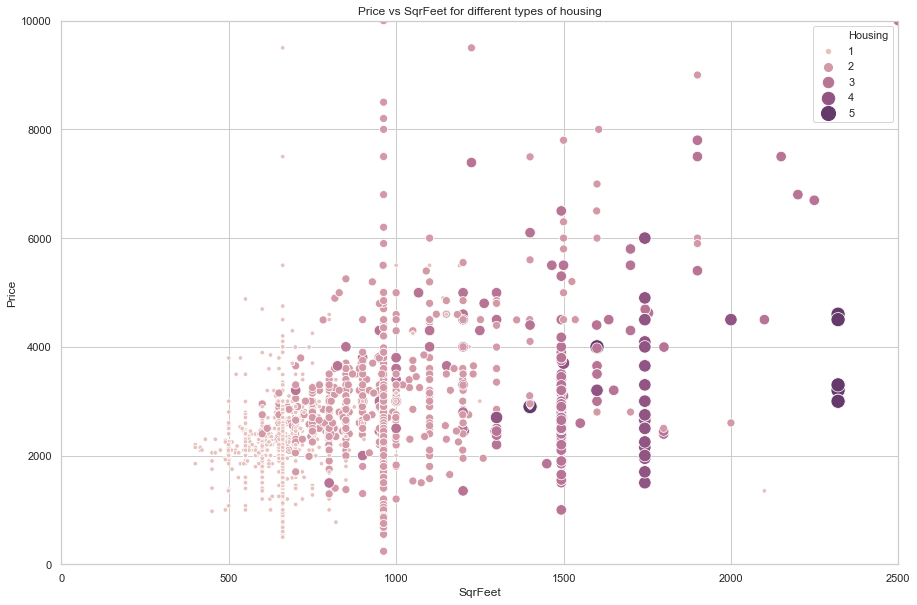

In [72]:
plt.figure(figsize=(15,10))
#rent_scatter = sns.scatterplot(x='SqrFeet', y='Price', style="Housing", data=df_cl_rent)
#rent_scatter.set_ylim(0,10000)
#rent_scatter.set_xlim(0,2500)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
rent_scatter = sns.scatterplot(x='SqrFeet', y='Price', hue="Housing", size="Housing", sizes=(20, 200), palette=cmap, 
                     legend="full", data=df_cl_rent)
rent_scatter.set_ylim(0,10000) # Limit ylim to 10,000 to remove the outlier prices of 20,000+ for better visualization
rent_scatter.set_xlim(0,2500) # Limit xlim to 2500 to remove the outlier sqr feet of 2500+ for better visualization
plt.title('Price vs SqrFeet for different types of housing')

Looking at the scatterplot above, we see a lot of variation in the price values over square feet. For 1 bedroom apartments, ignoring outliers, the square feet goes from ~400 to ~800, and the prices go from ~700 to ~5000. <br>

Text(0.5,1,'Price vs Number of Bedrooms')

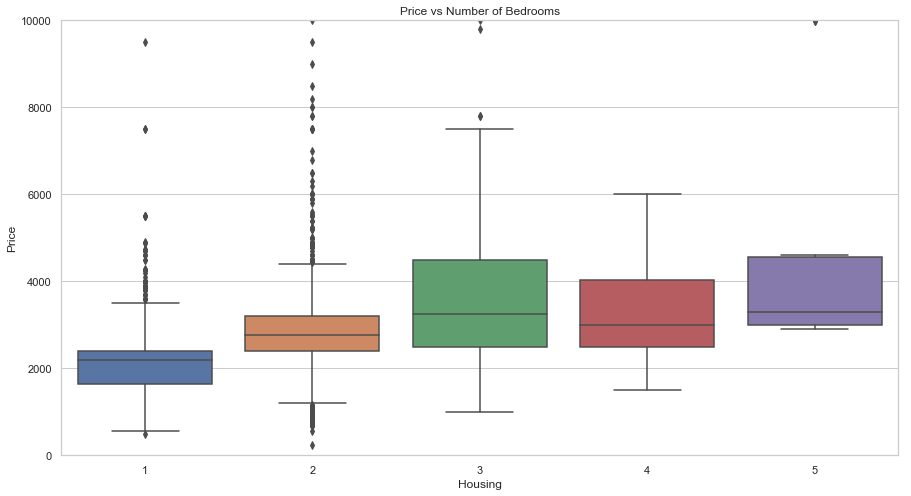

In [73]:
plt.figure(figsize=(15,8))
box_rent = sns.boxplot(x='Housing', y='Price', data=df_cl_rent)
box_rent.set_ylim(0, 10000)
plt.title('Price vs Number of Bedrooms')

The boxplot above shows median prices increasing upto 3 bedrooms, then the median falls for 4 and 5 bedroom units, probably due to the small sample size. Also we see a lot of outliers for 1 and 2 bedroom units, these are the luxury suites. <br><br>
Now, I will look at the property data.

In [54]:
df_cl_buy.head()

,Datetime,ID,Link,Price,SqrFeet,Hood,Housing
0,2018-10-13 23:26,6722902927,https://toronto.craigslist.ca/tor/reo/d/leslie...,1299000,0,(Gerrard and Coxwell),4br
1,2018-10-13 21:43,6722858430,https://toronto.craigslist.ca/tor/reb/d/beauti...,299900,850ft2,(100 Dundalk Dr),2br
2,2018-10-13 21:43,6722866107,https://toronto.craigslist.ca/tor/reb/d/freshl...,370000,1100ft2,(3 Massey Sq),2br
3,2018-10-13 21:29,6722860383,https://toronto.craigslist.ca/tor/reb/d/manhat...,828000,1590ft2,(131 Beecroft Road),2br
4,2018-10-13 20:19,6718248126,https://toronto.craigslist.ca/bra/reb/d/excell...,0,0,(Central Erin Mills),2br


In [55]:
# Same process as before for data cleaning
df_cl_buy['SqrFeet'] = df_cl_buy['SqrFeet'].str.slice(0, -3) # Remove 'ft2'
df_cl_buy['Housing'] = df_cl_buy['Housing'].str.slice(0, -2) # Remove 'br'
df_cl_buy.head()

,Datetime,ID,Link,Price,SqrFeet,Hood,Housing
0,2018-10-13 23:26,6722902927,https://toronto.craigslist.ca/tor/reo/d/leslie...,1299000,,(Gerrard and Coxwell),4
1,2018-10-13 21:43,6722858430,https://toronto.craigslist.ca/tor/reb/d/beauti...,299900,850,(100 Dundalk Dr),2
2,2018-10-13 21:43,6722866107,https://toronto.craigslist.ca/tor/reb/d/freshl...,370000,1100,(3 Massey Sq),2
3,2018-10-13 21:29,6722860383,https://toronto.craigslist.ca/tor/reb/d/manhat...,828000,1590,(131 Beecroft Road),2
4,2018-10-13 20:19,6718248126,https://toronto.craigslist.ca/bra/reb/d/excell...,0,,(Central Erin Mills),2


In [56]:
df_cl_buy['Housing'].replace('', np.nan, inplace=True)
df_cl_buy.dropna(subset=['Housing'], inplace=True)
df_cl_buy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3041 entries, 0 to 3376
Data columns (total 7 columns):
Datetime    3041 non-null object
ID          3041 non-null int64
Link        3041 non-null object
Price       3041 non-null int64
SqrFeet     3041 non-null object
Hood        3041 non-null object
Housing     3041 non-null object
dtypes: int64(2), object(5)
memory usage: 190.1+ KB


In [57]:
df_cl_buy['SqrFeet'].replace('', np.nan, inplace=True)
df_cl_buy[['Housing']] = df_cl_buy[['Housing']].astype(int)
df_cl_buy[['SqrFeet']] = df_cl_buy[['SqrFeet']].astype(float)
df_cl_buy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3041 entries, 0 to 3376
Data columns (total 7 columns):
Datetime    3041 non-null object
ID          3041 non-null int64
Link        3041 non-null object
Price       3041 non-null int64
SqrFeet     1105 non-null float64
Hood        3041 non-null object
Housing     3041 non-null int32
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 178.2+ KB


In [58]:
df_cl_buy['SqrFeet'] = df_cl_buy['SqrFeet'].fillna(df_cl_buy.groupby('Housing')['SqrFeet'].transform('mean'))
df_cl_buy.dropna(subset=['SqrFeet'], inplace=True)
df_cl_buy.groupby('Housing').mean()

,ID,Price,SqrFeet
Housing,,,
1,6.713229e+09,376818.882133,673.802439
2,6.713079e+09,424415.386909,1058.397727
3,6.713080e+09,535100.608696,1587.651316
4,6.712815e+09,808247.584746,2548.000000
5,6.713567e+09,816386.187500,3275.000000
8,6.697326e+09,739497.500000,2800.000000


In [59]:
df_cl_buy.describe()

,ID,Price,SqrFeet,Housing
count,3.040000e+03,3.040000e+03,3040.000000,3040.000000
mean,6.713114e+09,4.415958e+05,1073.873450,1.897039
std,6.770756e+06,5.483275e+05,496.897664,0.847887
min,6.678920e+09,0.000000e+00,85.000000,1.000000
25%,6.708324e+09,3.000000e+03,673.802439,1.000000
50%,6.713995e+09,4.688000e+05,1058.397727,2.000000
75%,6.718583e+09,6.399000e+05,1100.000000,2.000000
max,6.722903e+09,1.500000e+07,5000.000000,8.000000


In [60]:
df_cl_buy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3040 entries, 0 to 3376
Data columns (total 7 columns):
Datetime    3040 non-null object
ID          3040 non-null int64
Link        3040 non-null object
Price       3040 non-null int64
SqrFeet     3040 non-null float64
Hood        3040 non-null object
Housing     3040 non-null int32
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 178.1+ KB


In [61]:
# Remove these since they're either rent data, or insane luxury data (ex: 1 row of 15 million condo price)
df_cl_buy = df_cl_buy[(df_cl_buy['Price'] >= 10000) & (df_cl_buy['Price'] <= 10000000)]
df_cl_buy.describe()

,ID,Price,SqrFeet,Housing
count,1.967000e+03,1.967000e+03,1967.000000,1967.000000
mean,6.713011e+09,6.736826e+05,1055.588738,1.852059
std,6.464886e+06,4.447095e+05,522.431326,0.865276
min,6.680159e+09,2.850000e+04,85.000000,1.000000
25%,6.708578e+09,4.789000e+05,673.802439,1.000000
50%,6.713624e+09,5.800000e+05,950.000000,2.000000
75%,6.718116e+09,7.290000e+05,1100.000000,2.000000
max,6.722903e+09,6.895000e+06,5000.000000,8.000000


In [62]:
df_cl_buy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 3373
Data columns (total 7 columns):
Datetime    1967 non-null object
ID          1967 non-null int64
Link        1967 non-null object
Price       1967 non-null int64
SqrFeet     1967 non-null float64
Hood        1967 non-null object
Housing     1967 non-null int32
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 115.3+ KB


In [63]:
mean_buy_stats = df_cl_buy.groupby('Housing').mean()
mean_buy_stats
# The average price for 8 bedroom is lower than 5 bedrooms, that's because one of the rows lists the price as $30,000, 
# which is obviously rent data. I will remove this row.

,ID,Price,SqrFeet
Housing,,,
1,6.713353e+09,5.265859e+05,673.806963
2,6.712914e+09,6.939522e+05,1058.638937
3,6.712796e+09,8.454105e+05,1588.704984
4,6.711969e+09,1.206065e+06,2547.974684
5,6.712307e+09,1.304098e+06,3275.000000
8,6.697326e+09,7.394975e+05,2800.000000


In [64]:
df_cl_buy.drop(df_cl_buy[(df_cl_buy['Housing'] == 8) & (df_cl_buy['Price'] <= 1000000)].index, inplace=True)
df_cl_buy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1966 entries, 0 to 3373
Data columns (total 7 columns):
Datetime    1966 non-null object
ID          1966 non-null int64
Link        1966 non-null object
Price       1966 non-null int64
SqrFeet     1966 non-null float64
Hood        1966 non-null object
Housing     1966 non-null int32
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 115.2+ KB


In [65]:
mean_buy_stats = df_cl_buy.groupby('Housing').mean()
mean_buy_stats

,ID,Price,SqrFeet
Housing,,,
1,6.713353e+09,5.265859e+05,673.806963
2,6.712914e+09,6.939522e+05,1058.638937
3,6.712796e+09,8.454105e+05,1588.704984
4,6.711969e+09,1.206065e+06,2547.974684
5,6.712307e+09,1.304098e+06,3275.000000
8,6.709217e+09,1.449000e+06,2800.000000


The average property price for a 1 bedroom condominium is $ 526,586, barely within reach for young people.<br>
Surprisingly, the average square feet for 8 bedrooms is lower than 5 bedrooms, but this is not significant since there's only 1 row for 8 bedroom data.

In [66]:
df_cl_buy.groupby('Housing')['Price'].agg(['min', 'max', 'mean', 'median', 'count'])

,min,max,mean,median,count
Housing,,,,,
1,189900,1599000,5.265859e+05,499900,764
2,114000,2899900,6.939522e+05,647000,839
3,245000,6895000,8.454105e+05,669000,273
4,28500,5980000,1.206065e+06,998000,79
5,1120000,1999999,1.304098e+06,1199990,10
8,1449000,1449000,1.449000e+06,1449000,1


Another interesting detail is there's more 2 bedroom condo's for sale than 1 bedroom.
<br><br>
Below, we see the same trend as the rent data for average price per square feet: it decreases.

In [67]:
mean_buy_stats['Price']/mean_buy_stats['SqrFeet'] # Price per sqr feet

Housing
1    781.508549
2    655.513573
3    532.138106
4    473.342541
5    398.197832
8    517.500000
dtype: float64

Text(0.5,1,'Price vs Square Feet')

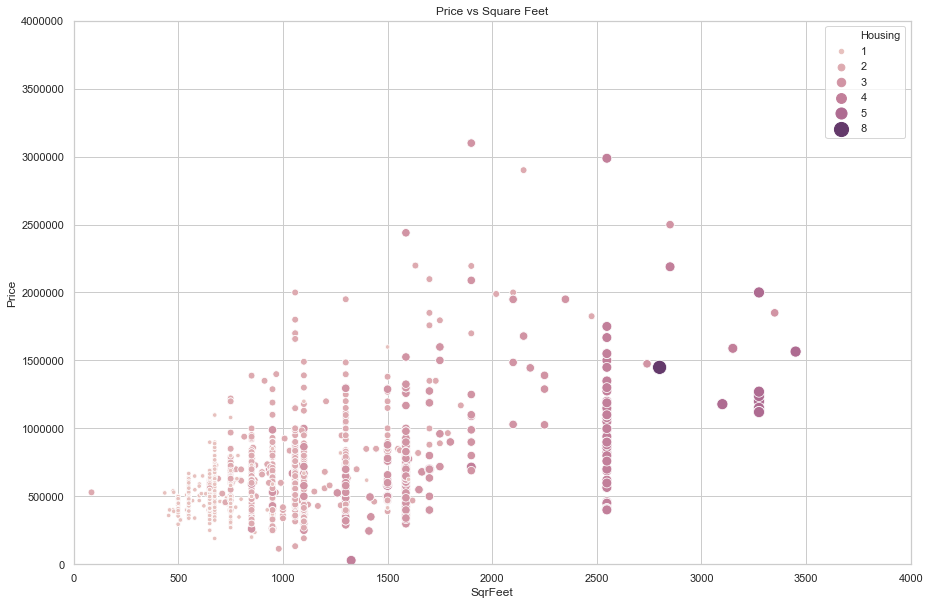

In [74]:
plt.figure(figsize=(15,10))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
buy_scatter = sns.scatterplot(x='SqrFeet', y='Price', hue="Housing", size="Housing", sizes=(20, 200), palette=cmap, 
                     legend="full", data=df_cl_buy)
buy_scatter.set_ylim(0,4000000) # Limit ylim to 4,000,000 to remove the outlier prices of 4,000,000+ for better visualization
buy_scatter.set_xlim(0,4000) # Limit xlim to 4000 to remove the outlier sqr feet of 4000+ for better visualization
plt.title('Price vs Square Feet')

Looking at the scatterplot above, we see once again a lot of variation and similar trends. For 1 bedroom condo's, ignoring outliers, the square feet goes from ~400 to ~700, and the price goes from ~250,000 to ~1.1 million.

Text(0.5,1,'Price vs Number of Bedrooms')

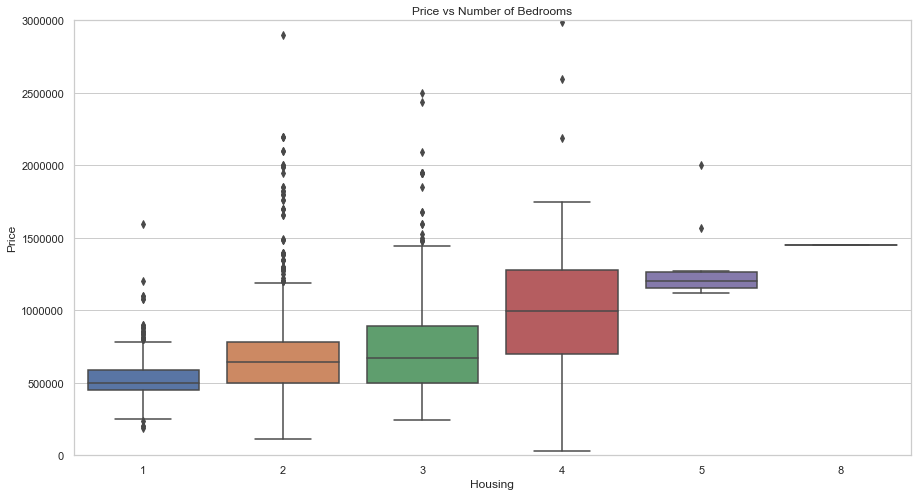

In [75]:
plt.figure(figsize=(15,8))
box_buy = sns.boxplot(x='Housing', y='Price', data=df_cl_buy)
box_buy.set_ylim(0, 3000000)
plt.title('Price vs Number of Bedrooms')

Once again, we see similar trends: A lot of outliers for 1-3 bedrooms, which are luxury units. The median increases as the number of bedroom goes up as expected.